In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
dfx.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
dfy.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


In [5]:
x = dfx.values
y = dfy.values
print(x.shape)
print(y.shape)

(576, 8)
(576, 1)


In [6]:
y = y.reshape((-1,))

In [7]:
print(y.shape)

(576,)


## KNN Algorithm

In [22]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=50):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return int(pred)

In [23]:
def get_acc(y_pred,y):
    return  float((y_pred==y).sum())/y.shape[0]

In [24]:
dfx_test = pd.read_csv('Diabetes_XTest.csv')
x_test = dfx_test.values
print(x_test.shape)

(192, 8)


In [25]:
y_t = []
for x_t in x:
    y_t.append(knn(x,y,x_t)) 

In [26]:
print(get_acc(y_t,y))

0.7413194444444444


## Saving the y_test values to csv files

In [40]:
df = pd.DataFrame(data=y_t)
df.to_csv("ytest.csv")

In [42]:
df.head(n=10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [45]:
accuracy = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    pred = knn.predict(x)
    accuracy.append(metrics.accuracy_score(y,pred))

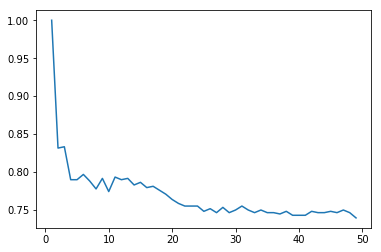

In [49]:
indices = np.arange(1,50)
plt.plot(indices,accuracy)

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
pred = knn.predict(x_test)

In [55]:
df = pd.DataFrame(data=pred)
df.to_csv("ytest.csv")
df.head(n=10)

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0
